In [52]:
import pandas as pd
import numpy as np
import wget

In [348]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [347]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [345]:
!wget $data_url

zsh:1: command not found: wget


In [344]:
!wget $data_url

zsh:1: command not found: wget


In [349]:
df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [350]:
#make data consistant lower case + space to _

In [351]:
df.columns # index is special data structure

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [352]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [353]:
string_columns = df.dtypes[df.dtypes == 'object'].index

In [354]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [355]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [356]:
df.isnull().sum().sum()

3850

In [357]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline #make sure all plot can be displayed in notebook

UsageError: unrecognized arguments: #make sure all plot can be displayed in notebook


In [359]:
df.msrp

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11914, dtype: int64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

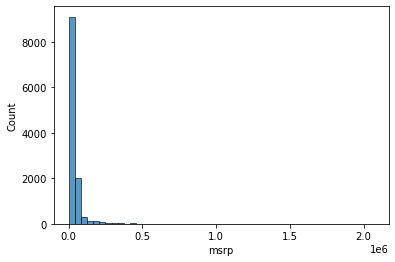

In [360]:
sns.histplot(df.msrp, bins = 50) # we see long tail distribution

<AxesSubplot:xlabel='msrp', ylabel='Count'>

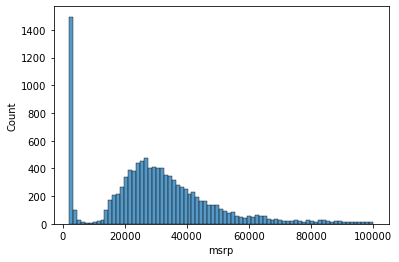

In [361]:
sns.histplot(df.msrp[df.msrp<100000], bins = 77) #zoom in

<AxesSubplot:xlabel='msrp', ylabel='Count'>

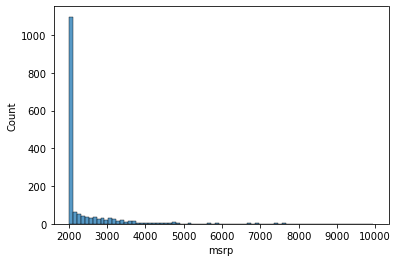

In [362]:
sns.histplot(df.msrp[df.msrp<10000], bins = 77) #zoom in

<AxesSubplot:xlabel='msrp', ylabel='Count'>

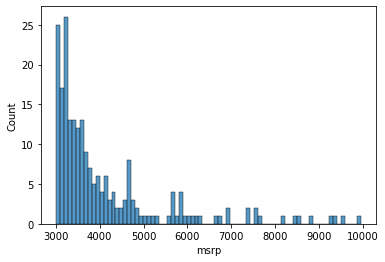

In [363]:
sns.histplot(df.msrp[(df.msrp<10000) & (df.msrp>3000)], bins = 77) #zoom in

<AxesSubplot:xlabel='msrp', ylabel='Count'>

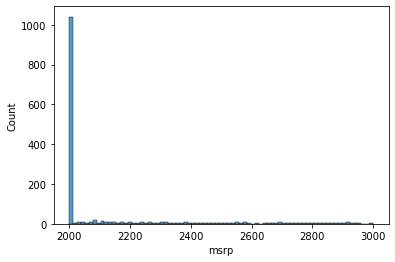

In [364]:
sns.histplot(df.msrp[(df.msrp<=3000) & (df.msrp>=1000)], bins = 77) #zoom in

In [365]:
# we apply log distribution 

In [366]:
np.log([1, 10, 1000, 10000]) # get values more compact
# problem is with 0, but we can add 1

array([0.        , 2.30258509, 6.90775528, 9.21034037])

In [367]:
np.log([0 + 1, 10 + 1, 1000 + 1])

array([0.        , 2.39789527, 6.90875478])

In [368]:
# np.log1p (adds one automatic)
np.log1p([0, 1, 1.718281828])

array([0.        , 0.69314718, 1.        ])

In [369]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

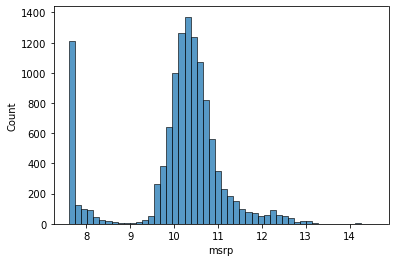

In [370]:
sns.histplot(price_logs, bins = 50) # not so large tail, data gets more compact
# remove effect of long tail by log transformation

In [371]:
df.isnull().sum() # sum accross columns
# we should keep in mind when we train our model

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up validation set

In [372]:
# we should split our data set on 3 seta = TRAIN + VALIDATION + TEST
# create from each part X and y(predictable value)
# 60% 20% 20%

In [373]:
n = len(df)
n_val = int(n * 0.2)
n_test = n_val
n_train = n - n_val - n_test

In [374]:
n_val + n_test + n_train == n
n_val + n_test + n_train, n

(11914, 11914)

In [375]:
df.iloc[10:20]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,43550
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000


In [376]:
idx = np.arange(n)

In [377]:
np.random.seed(2)
np.random.shuffle(idx)


In [378]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [379]:
n_train+n_val

9532

In [380]:
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]
df_train = df.iloc[idx[:n_train]] # problem, we should shufle

In [381]:
df_val.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
7587,toyota,pickup,1995,regular_unleaded,116.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,25,19,2031,2000
7035,nissan,murano,2016,regular_unleaded,260.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,28,21,2009,34400
892,saab,900,1996,regular_unleaded,185.0,4.0,manual,front_wheel_drive,2.0,"luxury,performance",compact,convertible,26,18,376,2000
4911,land_rover,freelander,2004,regular_unleaded,174.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",compact,4dr_suv,19,16,258,25330
10011,dodge,stratus,2004,regular_unleaded,200.0,6.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,25,17,1851,22370


In [382]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [383]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [384]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685


In [385]:
y_train = np.log1p(df_train.msrp).values
y_val = np.log1p(df_val.msrp).values
y_test = np.log1p(df_test.msrp).values

In [386]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear regression

In [141]:
df_train.iloc[10], y_train[10]

(make                                 rolls-royce
 model                     phantom_drophead_coupe
 year                                        2015
 engine_fuel_type     premium_unleaded_(required)
 engine_hp                                  453.0
 engine_cylinders                            12.0
 transmission_type                      automatic
 driven_wheels                   rear_wheel_drive
 number_of_doors                              2.0
 market_category        exotic,luxury,performance
 vehicle_size                               large
 vehicle_style                        convertible
 highway_mpg                                   19
 city_mpg                                      11
 popularity                                    86
 Name: 10, dtype: object,
 13.08107460729463)

In [142]:
[453, 11, 86] # data on we look at for linear regression

[453, 11, 86]

# Linear regression vector form

In [ ]:
#g(X) = y

$g(x_i) = \omega_0 + \sum\limits_{j=1}^n x_{ij}\cdot \omega_j = \omega_0 + \omega^Tx_i$

In [143]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res += xi[j] * w[j]
    
    return res

In [151]:
w0 = 7.17

In [152]:
w = [0.01, 0.04, 0.002]

In [153]:
w_new = [w0] + w

In [155]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
x = [x1, x2, x10]

In [150]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w)

In [157]:
X = np.array(x)

In [159]:
np.expm1(X.dot(w_new))

array([237992.82334859, 768348.51018973, 222347.22211011])

In [160]:
def linear_regression(X):
    return X.dot(w_new)

# Training linear regression model

In [161]:
#g(X) = Wx = y(we want close to y)
#we need to find a way to find W
# Xw = y => w = X^(-1)y if inversed matrix exists for X, but X is usually rectangular matrix mxn
# inverse matrix can exist only for square matrix
# we can find aproximate solution
# X^T X W = X^T y , X^TX - GRAM Matrix it would be square matrix
# (X^TX)^(-1)(X^TX) w = (X^TX)^(-1) X^T y
# w = (X^TX)^(-1)X^Ty
# book element of statistical learnings
# it's not a solution for this matrix, but it's nearest to solution, it can be proved

In [205]:
X = [[148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 1385],
    [172, 25, 2031],
    [413, 11, 86],
    [38, 54, 1385],
    [142, 25, 2031],
    [453, 31, 86]]

In [206]:
# include base term, it gives us baseline: how much car is cost if we don't know anything about it

In [207]:
y = [10, 20, 15, 25, 10, 20, 15, 25, 12]

In [208]:
X = np.array(X)

In [204]:
# add ones
X = np.column_stack([np.ones(X.shape[0]), X])

In [195]:
XTX = X.T.dot(X) #GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)



In [196]:
w0 = w_full[0]
w = w_full[1:]

In [197]:
w0, w

(31.613102508079386, array([-0.02684346, -0.24352135, -0.0018937 ]))

In [309]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
#     w_full = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    XTX = X.T.dot(X) #GRAM MATRIX
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)



    return w_full[0], w_full[1:] # base_term + weights

In [217]:
train_linear_regression(X, y)

(31.613102508079386, array([-0.02684346, -0.24352135, -0.0018937 ]))

# Car price baseline model

In [218]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [219]:
# we want extract usefull numerical columns

In [220]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [320]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [321]:
df_test[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,165.0,6.0,20,15,549
1,389.0,12.0,15,11,617
2,268.0,6.0,25,18,2031
3,114.0,4.0,26,18,870
4,224.0,8.0,24,16,5657
...,...,...,...,...,...
2377,200.0,6.0,18,13,1385
2378,160.0,4.0,33,29,640
2379,250.0,6.0,22,15,1851
2380,174.0,4.0,42,31,2202


In [322]:
X_train = df_train[base].fillna(0).values

In [323]:
w0, w = train_linear_regression(X_train, y_train)

In [324]:
df_train[base].isnull().sum() #if we fill with zeros, so our model will ignore this features
# if it's engine HP zero doesn't make sense, we can fill:
# with mean value, with min or max value

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [325]:
y_pred = w0 + X_train.dot(w)

In [326]:
# we can plot our predictions

<AxesSubplot:ylabel='Count'>

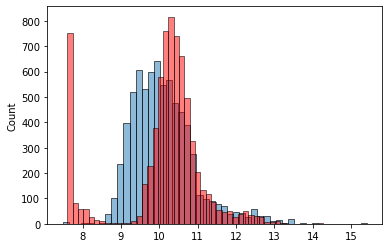

In [327]:
sns.histplot(y_pred, bins = 50, alpha = 0.5)
sns.histplot(y_train, color ='red', bins = 50, alpha = 0.5)

<AxesSubplot:ylabel='Count'>

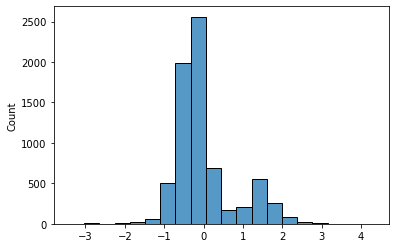

In [328]:
sns.histplot(y_pred - y_train, bins = 20)

# RMSE

In [329]:
#RMSE = (g(x_i) - y_i)^2

In [330]:
RMSE = np.sqrt(((y_pred - y_train)**2).mean())

In [331]:
RMSE

0.7554192603920132

In [332]:
def rmse(y, y_train):
    return np.sqrt(((y - y_train)**2).mean())

In [333]:
rmse(y_pred, y_train)

0.7554192603920132

# Validating the model

In [269]:
X_val = df_val[base].fillna(0).values

In [272]:
rmse(w0 + X_val.dot(w), y_val)

0.7616530991301591

In [275]:
true_rmse = rmse(np.expm1(w0 + X_val.dot(w)), np.expm1(y_val))

In [276]:
true_rmse

68201.6471228808

# Simpe feature engineering

In [277]:
# we want to use year of car

In [306]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    return df[base].fillna(0).values

In [334]:
base.append('age')

In [289]:
df_train.age.dtype

dtype('int64')

In [335]:
X_train = prepare_X(df_train)

In [336]:
X_train.shape

(7150, 6)

In [337]:
y_train.shape

(7150,)

In [338]:
X_val = prepare_X(df_val)

In [341]:
w0, w = train_linear_regression(X_train, y_train)

In [387]:
y_pred = w0 + X_val.dot(w)


<AxesSubplot:ylabel='Count'>

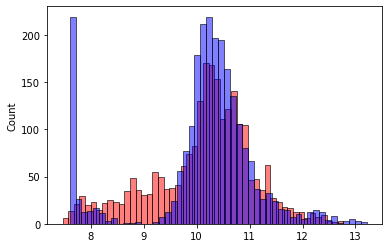

In [390]:
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5)
sns.histplot(y_val, color = 'blue', bins = 50, alpha = 0.5)

<AxesSubplot:ylabel='Count'>

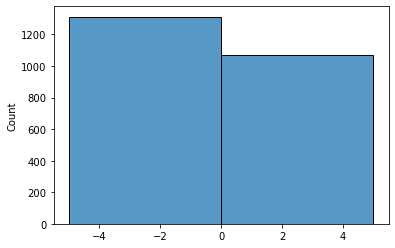

In [391]:
sns.histplot(y_val - y_pred, bins = [-5, 0, 5])

In [392]:
rmse(y_pred, y_val)

0.5172055461058329

In [393]:
rmse(np.expm1(y_pred), np.expm1(y_val))

32542.86948144511

# Categorical variables

In [394]:
df_train.number_of_doors # it's categorical variable not numerical

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [396]:
# represent one categorical columns with many binary
# for each value of dors we can do new column and fill them with zeros and ones

In [397]:
df_train.number_of_doors.nunique()

3

In [398]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [401]:
# how we can create new columns
(df_train.number_of_doors==4).astype('int')

0       0
1       1
2       1
3       0
4       1
       ..
7145    0
7146    0
7147    1
7148    1
7149    1
Name: number_of_doors, Length: 7150, dtype: int64

In [402]:
base

['engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'age']

In [408]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' % v)
    
    return df[features].fillna(0).values



In [409]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [418]:
w0, w = train_linear_regression(prepare_X(df_train), y_train)
y_pred = w0 + prepare_X(df_val).dot(w)
rmse(y_pred, y_val)

0.5157995641502929

In [435]:
makes = list(df.make.value_counts().head(5).index)

In [436]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' % v)
    
    
    for v in makes:
        df['make_%s' % v] = (df.make==v).astype('int')
        features.append('make_%s' % v)
    
    return df[features].fillna(0).values




In [437]:
w0, w = train_linear_regression(prepare_X(df_train), y_train)
y_pred = w0 + prepare_X(df_val).dot(w)
rmse(y_pred, y_val)

0.5076038849555178

In [438]:
df_train.dtypes 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [447]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [448]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categorical.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c]==v).astype('int')
            features.append('%s_%s' % (c, v))
    
    return df[features].fillna(0).values





In [449]:
w0, w = train_linear_regression(prepare_X(df_train), y_train)
y_pred = w0 + prepare_X(df_val).dot(w)
rmse(y_pred, y_val)

16.59073704216528

In [452]:
# we made model worst

# Regularization

In [453]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
#     w_full = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    XTX = X.T.dot(X) #GRAM MATRIX
    XTX += r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)



    return w_full[0], w_full[1:] # base_term + weights

In [462]:
w0, w = train_linear_regression_reg(prepare_X(df_train), y_train, 0.0001) # what is the best value for r?
y_pred = w0 + prepare_X(df_val).dot(w)
rmse(y_pred, y_val)

0.46081536753114827

In [461]:
rmse(np.expm1(y_pred), np.expm1(y_val))

28367.78578119894

# Tuning the model

In [464]:
# find the best regularization parameter
# r effect on model quality

In [466]:
for r in [0, 0.000001, 0.0001, 0.001, 0.1, 1, 10]:    
    w0, w = train_linear_regression_reg(prepare_X(df_train), y_train, r) # what is the best value for r?
    y_pred = w0 + prepare_X(df_val).dot(w)
    print(r, w0, rmse(y_pred, y_val))

0 -111668960656314.06 16.59073704216528
1e-06 101.24912778657206 0.46081519636258433
0.0001 7.136624669496717 0.46081536753114827
0.001 7.1306894115020985 0.4608158581995893
0.1 7.000232433605027 0.4608736549116128
1 6.25074784762026 0.4615812838275941
10 4.729512585657403 0.472609877266888


In [467]:
r = 0.001
w0, w = train_linear_regression_reg(prepare_X(df_train), y_train, r) # what is the best value for r?
y_pred = w0 + prepare_X(df_val).dot(w)

In [468]:
y_pred = w0 + prepare_X(df_val).dot(w)

<AxesSubplot:ylabel='Count'>

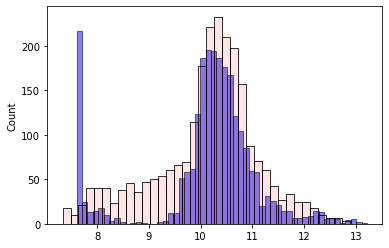

In [473]:
sns.histplot(y_val, color='blue', alpha = 0.5)
sns.histplot(y_pred, color= 'red', alpha = 0.1)

<AxesSubplot:ylabel='Count'>

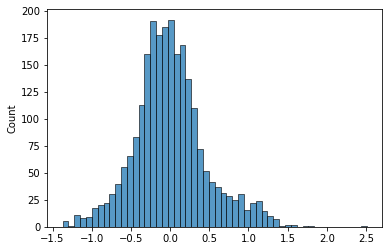

In [474]:
sns.histplot(y_val - y_pred)

# Using the model

In [475]:
# we should union data, teach model again, and use on test data

In [478]:
#data union
df_full_train = pd.concat([df_train, df_val])

In [480]:
df_full_train = df_full_train.reset_index(drop = True)

In [482]:
y_full_train = np.concatenate([y_train, y_val])

In [483]:
r = 0.001
w0, w = train_linear_regression_reg(prepare_X(df_full_train), y_full_train, r)
y_pred = w0 + prepare_X(df_test).dot(w)

In [484]:
rmse(y_test, y_pred)

0.46007539692531235

In [486]:
rmse(np.expm1(y_pred), np.expm1(y_test))

39037.70741149793

In [490]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [491]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [497]:
price = w0 + prepare_X(df_small).dot(w)
np.expm1(price), np.expm1(y_test[20])

(array([41459.3368969]), 35000.00000000001)